<a href="https://colab.research.google.com/github/SanjayBista1010/Classification/blob/main/HeartDiseaseRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart_disease.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [99]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [100]:
df['cholesterol'].value_counts()

,count
cholesterol,
0,172
254,16
211,13
204,13
234,13
...,...
316,1
278,1
157,1


In [101]:
df['resting bp s'].value_counts()

,count
resting bp s,
120,166
130,149
140,137
110,76
150,73
...,...
0,1
185,1
96,1


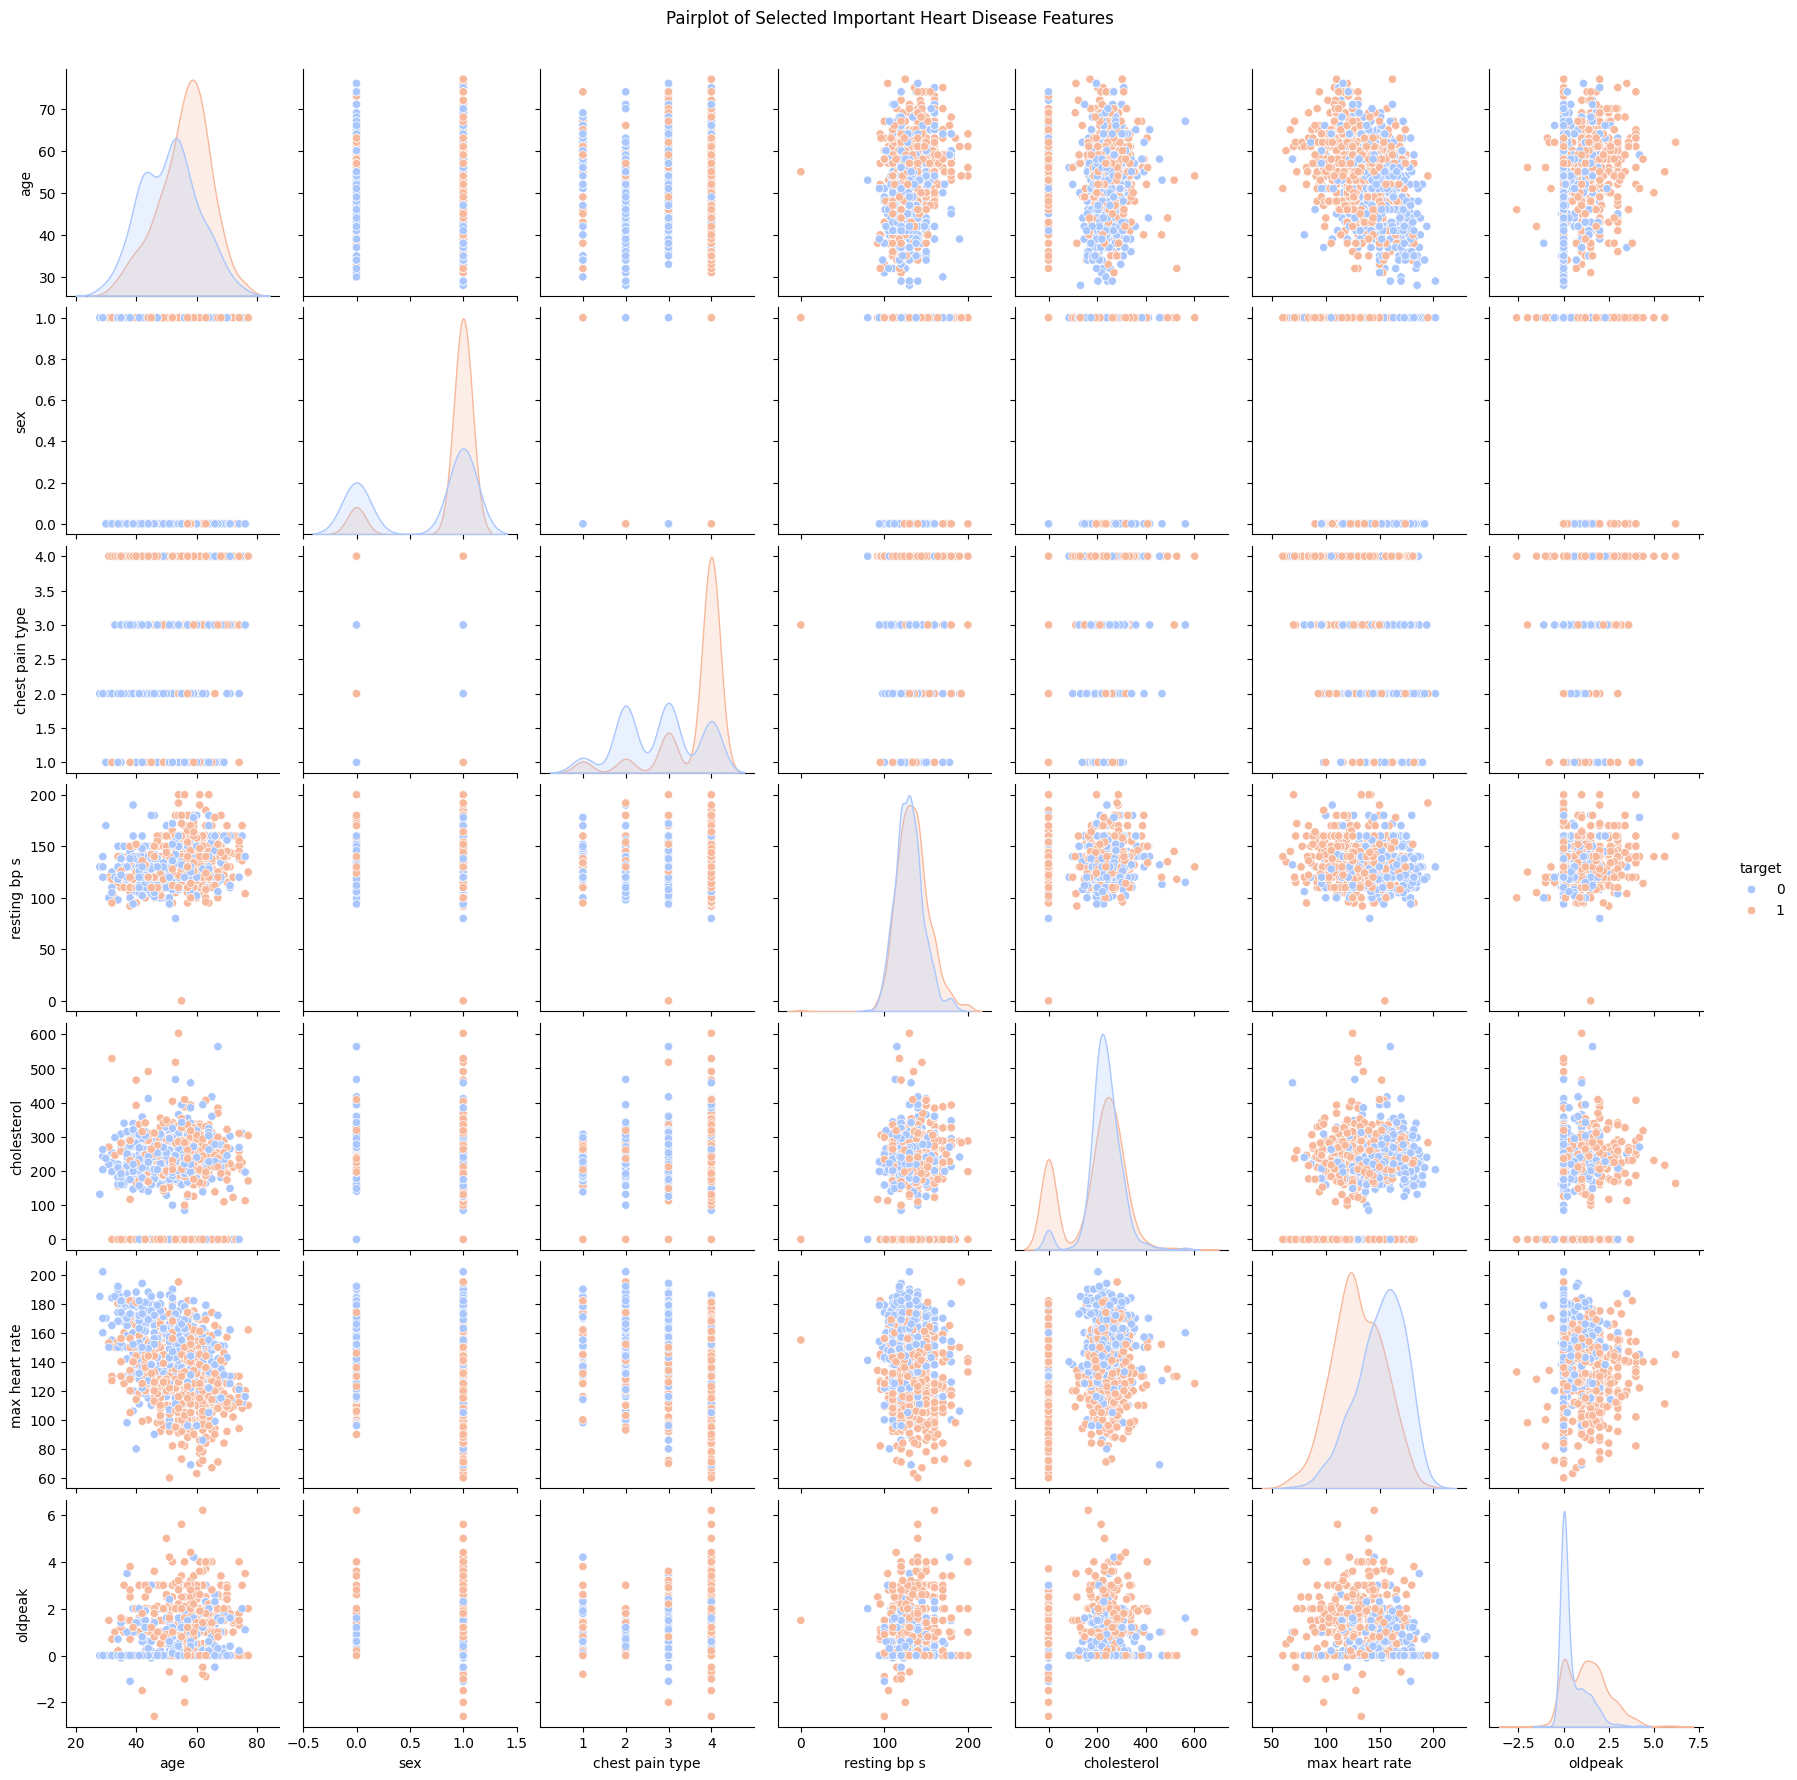

In [102]:
columns= [
    "age", "sex", "chest pain type", "resting bp s",
    "cholesterol", "max heart rate", "oldpeak", "target"
]

sns.pairplot(df[columns], hue="target", palette="coolwarm", diag_kind="kde")
plt.suptitle("Pairplot of Selected Important Heart Disease Features", y=1.02)
plt.show()

In [103]:
df["cholesterol"] = df["cholesterol"].replace(0, np.nan)

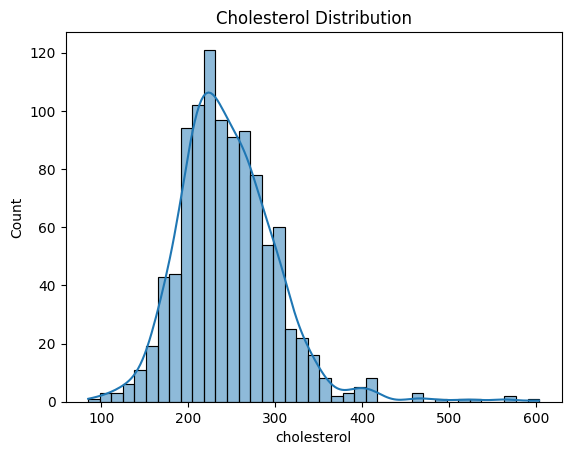

In [104]:
sns.histplot(df["cholesterol"], kde=True)
plt.title("Cholesterol Distribution")
plt.show()

In [105]:
df["cholesterol"] = df["cholesterol"].fillna(df["cholesterol"].median())

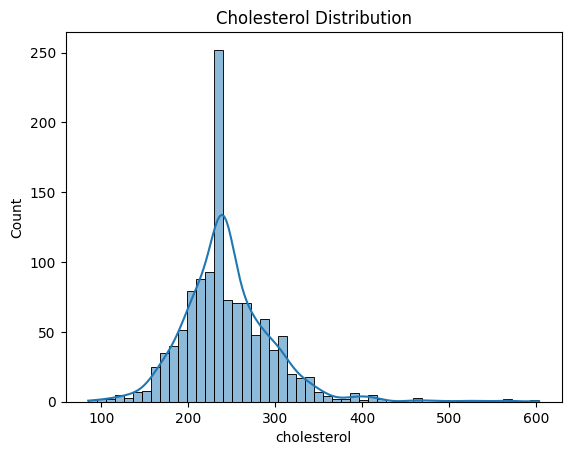

In [106]:
sns.histplot(df["cholesterol"], kde=True)
plt.title("Cholesterol Distribution")
plt.show()

<Axes: >

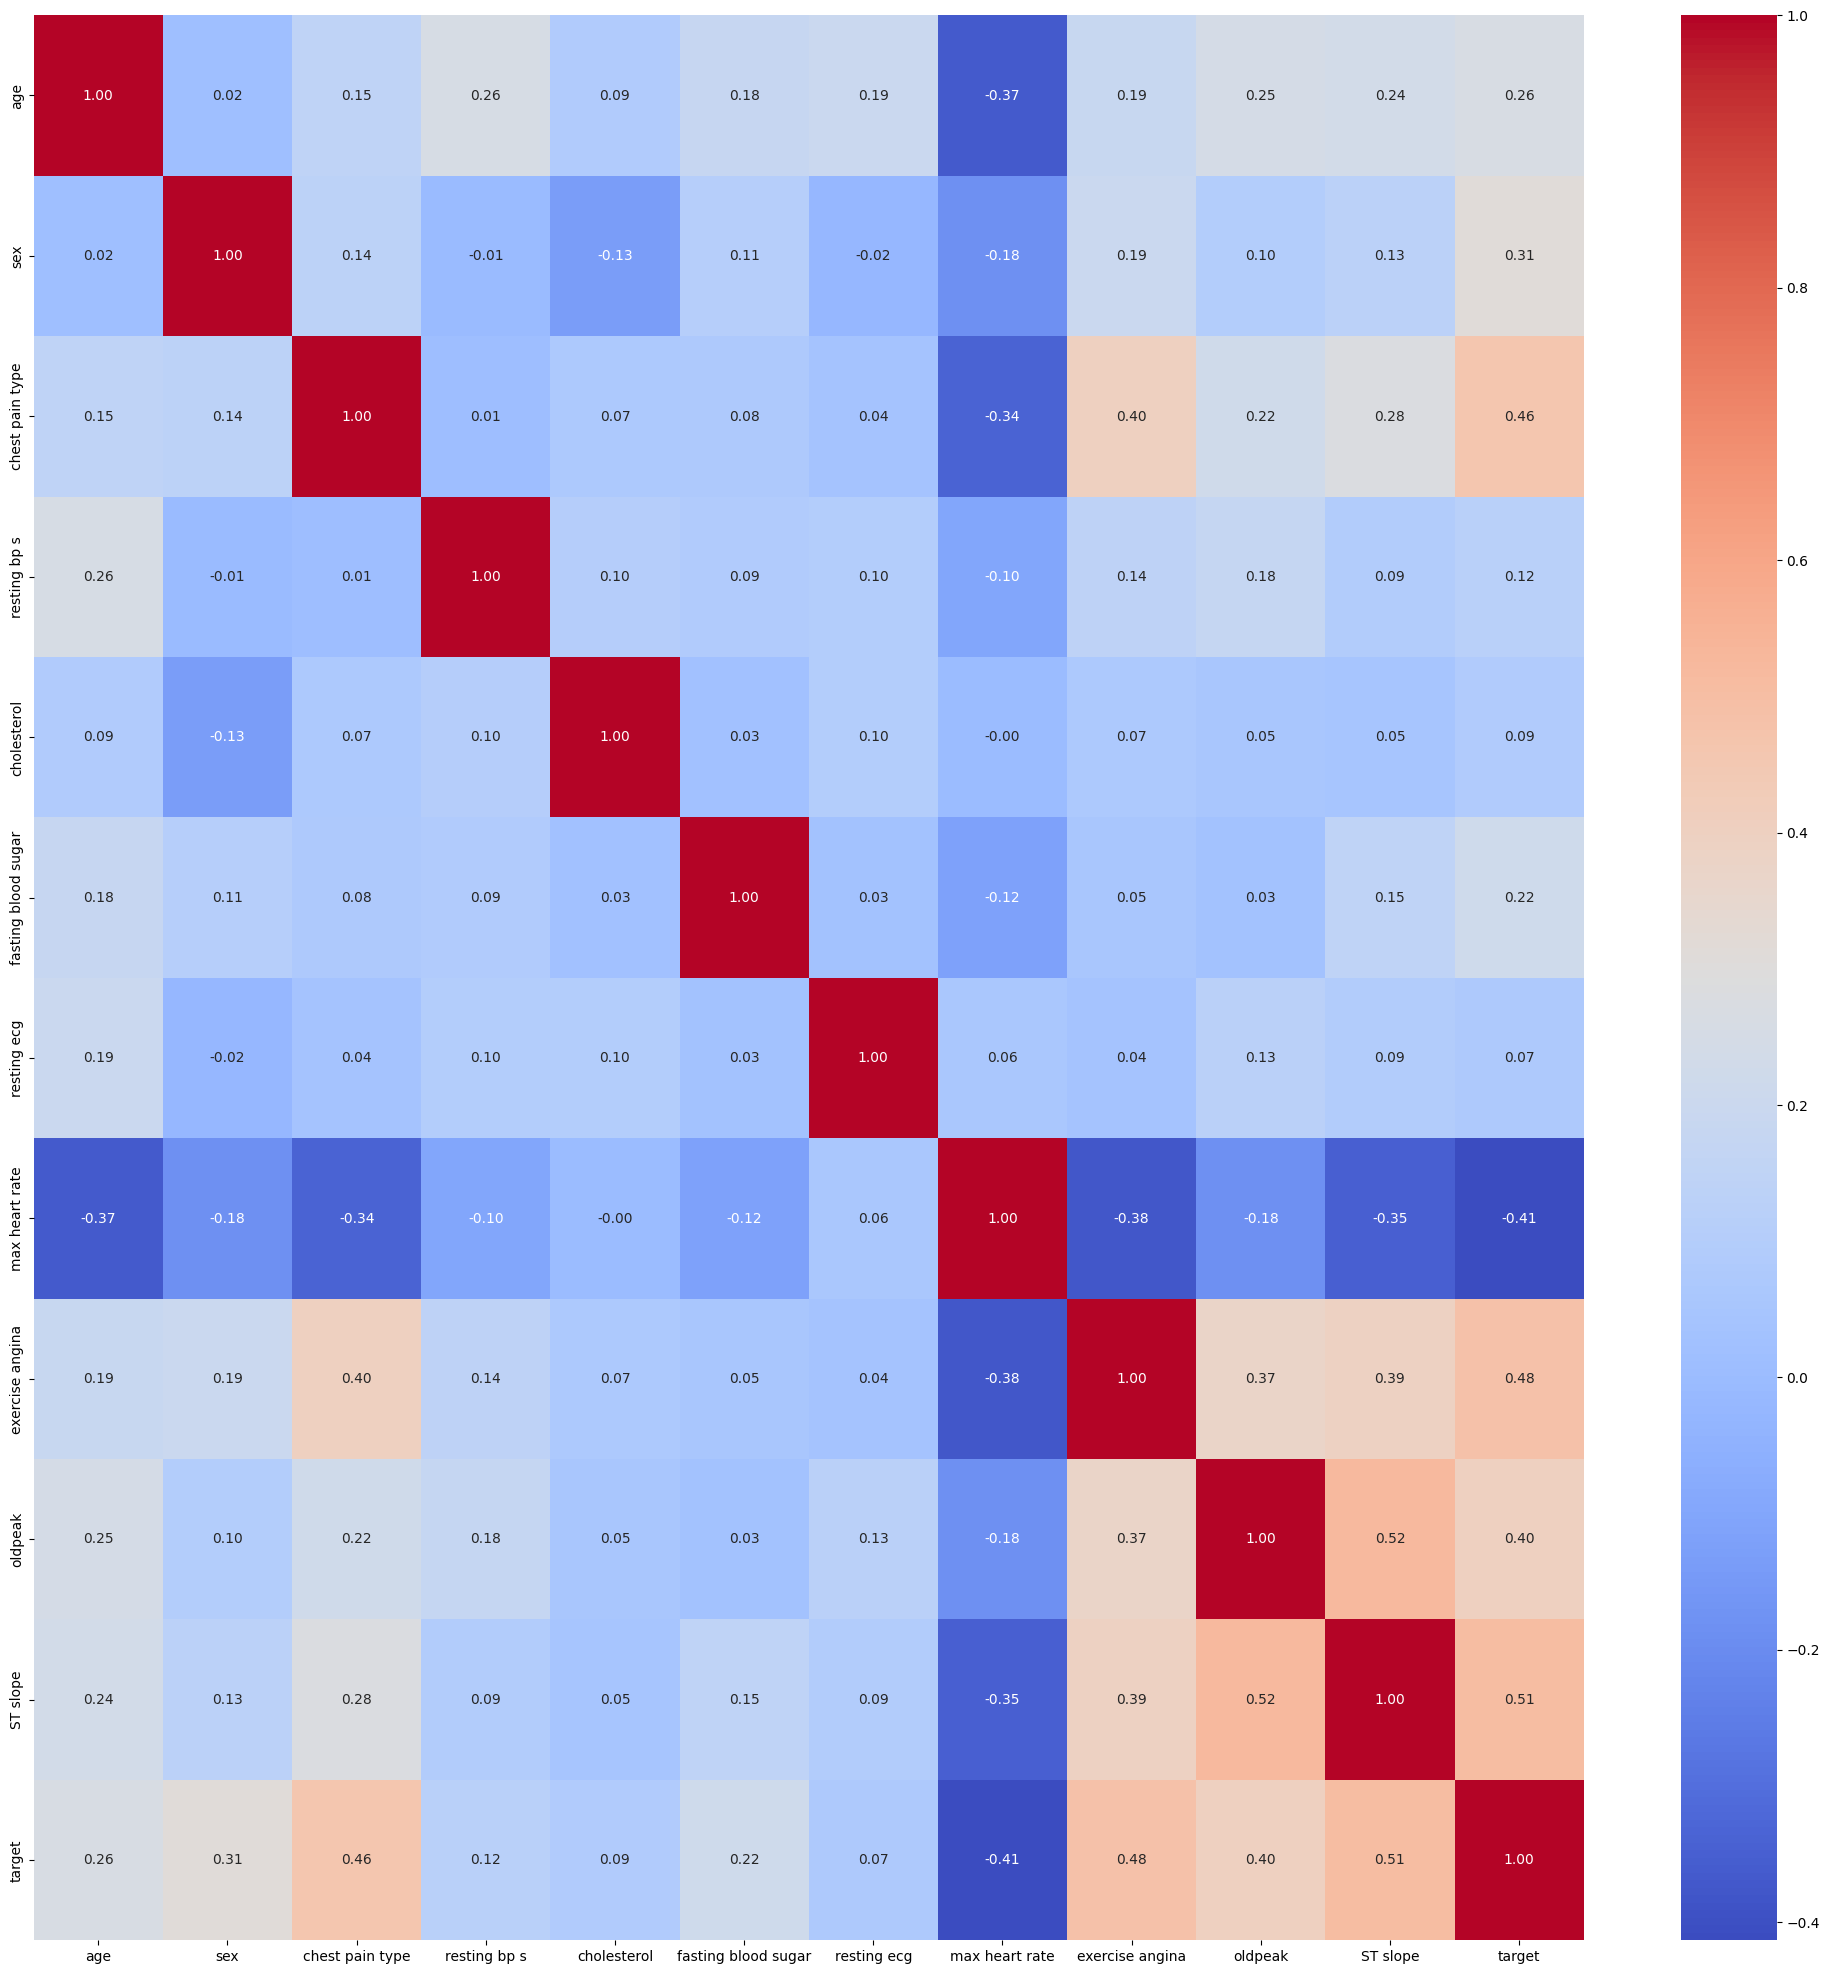

In [107]:
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

In [108]:
correlation = df.corr()['target'].drop('target')
correlation.sort_values(ascending=False)

,target
ST slope,0.505608
exercise angina,0.481467
chest pain type,0.460127
oldpeak,0.398385
sex,0.311267
age,0.262029
fasting blood sugar,0.216695
resting bp s,0.121415
cholesterol,0.086290
resting ecg,0.073059


In [109]:
X = df.drop('target', axis=1)
X

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289.0,0,0,172,0,0.0,1
1,49,0,3,160,180.0,0,0,156,0,1.0,2
2,37,1,2,130,283.0,0,1,98,0,0.0,1
3,48,0,4,138,214.0,0,0,108,1,1.5,2
4,54,1,3,150,195.0,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264.0,0,0,132,0,1.2,2
1186,68,1,4,144,193.0,1,0,141,0,3.4,2
1187,57,1,4,130,131.0,0,0,115,1,1.2,2
1188,57,0,2,130,236.0,0,2,174,0,0.0,2


In [110]:
y=df['target']
y

,target
0,0
1,1
2,0
3,1
4,0
...,...
1185,1
1186,1
1187,1
1188,1


In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((833, 11), (357, 11), (833,), (357,))

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_test_scaled


(array([[-1.56610611,  0.57503993,  0.81505412, ..., -0.76791579,
          0.28849695,  0.64841466],
        [ 0.87789707, -1.73900966,  0.81505412, ..., -0.76791579,
          4.89405387,  2.29014539],
        [ 0.77163606,  0.57503993,  0.81505412, ...,  1.30222612,
          1.02538606,  2.29014539],
        ...,
        [ 0.77163606,  0.57503993, -2.33304517, ..., -0.76791579,
          1.57805289,  0.64841466],
        [ 0.87789707, -1.73900966,  0.81505412, ..., -0.76791579,
          2.49916427,  2.29014539],
        [-1.24732309,  0.57503993, -1.28367874, ..., -0.76791579,
         -0.81683671, -0.99331607]]),
 array([[ 0.77163606,  0.57503993,  0.81505412, ..., -0.76791579,
          0.10427467,  0.64841466],
        [ 0.027809  ,  0.57503993, -0.23431231, ...,  1.30222612,
          0.56483037,  0.64841466],
        [ 0.13407001, -1.73900966, -1.28367874, ..., -0.76791579,
         -0.81683671, -0.99331607],
        ...,
        [ 1.72798513,  0.57503993,  0.81505412, ...,  

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42, min_samples_leaf=3, min_samples_split=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, random_state=42)

In [122]:
y_pred = rf_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       107
           1       0.90      0.96      0.93       131

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



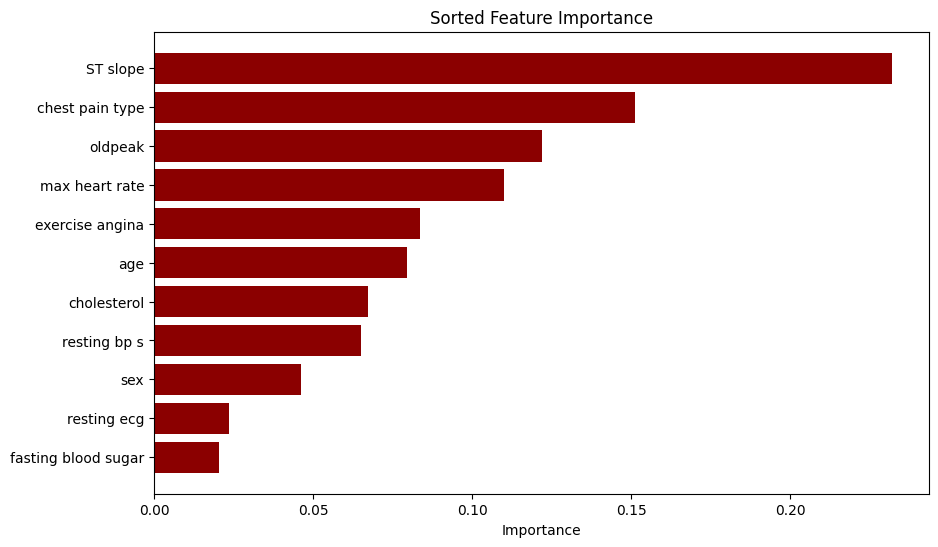

In [118]:
features = X.columns.tolist()
features_importance = rf_model.feature_importances_
feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': features_importance
})

feat_imp = feat_imp.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='darkred')
plt.xlabel('Importance')
plt.title('Sorted Feature Importance')
plt.show()

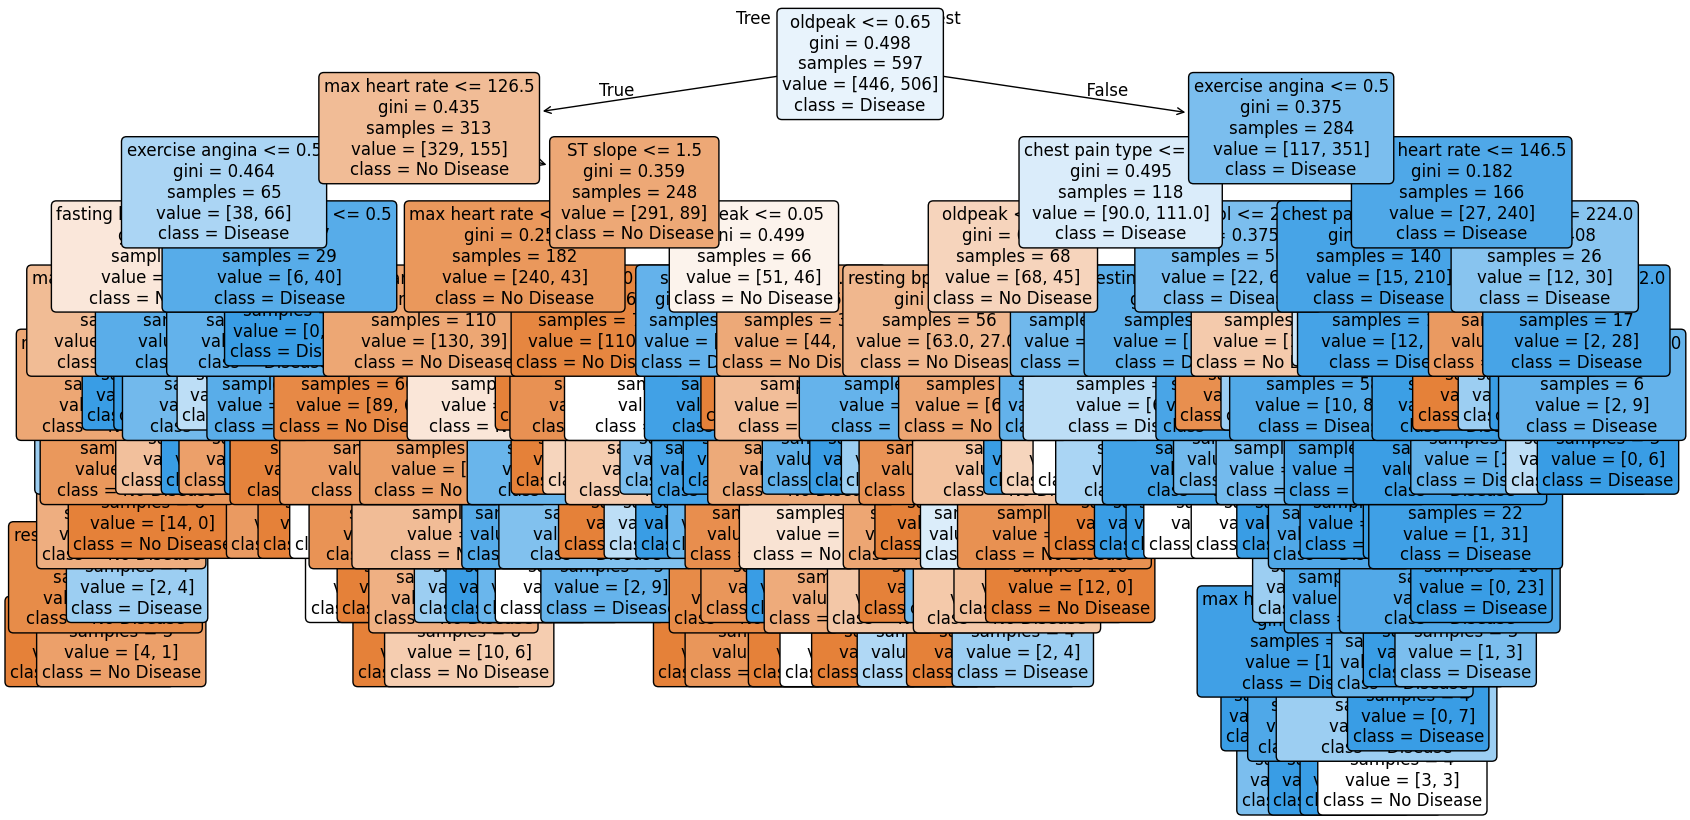

In [117]:
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0],
          feature_names=X.columns,
          class_names=["No Disease", "Disease"],
          filled=True, rounded=True, fontsize=12)
plt.title("Tree 0 from Random Forest")
plt.show()